In [1]:
import gensim.downloader as api

# nltk.download("stopwords")
# nltk.download("punkt")

print("loading dataset...")
wv = api.load("glove-twitter-25")
print("done!")

loading dataset...
done!


In [3]:
for i in ['microsoft', 'politics', 'corporate', 'apple', 'reddit', 'obama', 'dog']:
  if(i in wv.key_to_index):
    print(i, wv[i])


male [-6.9132e-01 -2.4751e-01 -9.1082e-02 -5.0218e-01  1.1348e+00 -8.4616e-01
  8.7484e-01  2.6716e-01 -1.1469e-01  6.2137e-01 -5.7546e-02 -1.7072e+00
 -2.8744e+00  4.5555e-01 -7.3985e-01  1.4007e+00  8.4090e-02  1.8650e-03
 -3.8978e-01 -2.4283e-01  2.9985e-01  1.0122e+00 -5.7060e-02 -1.3766e+00
 -7.0720e-01]
female [ 2.5177e-02  4.4369e-01 -3.2021e-01 -2.5793e-01  1.5684e+00 -2.6569e-01
  1.2292e+00 -2.2160e-01  2.0106e-01 -1.8663e-01 -3.9499e-01  1.4382e-01
 -3.8927e+00 -3.8828e-03 -1.1774e+00  3.8643e-01  7.5468e-02 -8.1885e-01
  9.3729e-01  3.5195e-01  6.9171e-01  1.2215e+00 -2.9893e-01 -1.8245e+00
 -6.1952e-01]
microsoft [ 1.2304     0.40331   -0.10809   -0.86166    0.41455   -0.45356
 -0.38301   -0.0083566  1.2839    -0.43736    1.321      0.058678
 -2.8713    -0.88536    0.42118   -0.24683   -0.0083483  1.0385
  0.55854   -0.21484   -0.33944   -1.7641    -0.19785   -0.86013
 -0.93408  ]
politics [ 1.2025   -0.10197  -1.2655   -0.54555   0.18702  -1.0537    0.79562
 -1.2262    0.

In [10]:
import nltk
import re
import string

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

sw = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    """Pre-process text and generate tokens

    Args:
        text: Text to tokenize.

    Returns:
        Tokenized text.
    """
    text = str(text).lower()  # Lowercase words
    text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )  # Remove punctuation

    tokens = text.split()
    tokens = [t for t in tokens if not t in sw]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    tokens = [ps.stem(token) for token in tokens]
    return tokens

clean_text("best movie ever! #themarvels #fuckyou")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chayapatr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['best', 'movi', 'ever', 'themarvel', 'fuckyou']

In [53]:
import numpy as np

def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model:
                try:
                    vectors.append(model[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [78]:
import pandas as pd
dataset = pd.read_csv('fetched.csv')
print([*dataset['post_caption']])
docs = [*dataset['post_caption']] # ['i love cats', 'i love kitten', 'i love dogs', 'disaster in alaska', 'tornado and tsunami', 'netflix announced new series']
vd = vectorize([clean_text(n) for n in docs], wv)
vd

['Thanks MOM 😡', 'Avarage Reddit user', 'diversity, inclusion, representation', "Follow Reddit's Content Policy", 'I don’t understand some people', 'Please, let it be ANYONE else', 'Every single time', 'Students, strikers, workers, hustlers, leaseholding business owners...your landlord and tax collector thank you for your service', 'I.e: hinata hyuga, gardevoir, susie haltman, ryuko matoi, basically anyone I simp for but barely know', 'Gta online gaming', 'APPLY DIRECTLY TO FOREHEAD', 'The future of memes is at our finger tips', '🍷👧😵\u200d💫🥴💃', 'I feel bad for basic bitches', 'D3@th by snu snu.', 'It’s easier than y’all, an doesn’t sound like you f*** your cousin', "You ain't a cop mama, you've been following a man around and yelling lies from a middle school cafe at him all day", 'FAFO', 'A meme only Australians will understand', 'Will you pull it?', 'It would not surprise me if the Office gets cancelled in the future', 'Cake and eat it too situation.', 'Day of the Dead', 'Hold it!', 

[array([-1.047025  ,  0.83371496,  0.5115995 ,  0.0980475 , -0.3498255 ,
        -0.69510996,  1.84675   ,  0.40058   , -0.93504   ,  0.35139352,
        -0.38591   ,  0.16808051, -4.2287    , -0.29061002,  0.005155  ,
        -0.325448  ,  0.70596   , -0.759515  , -0.54428   , -0.15937436,
         0.33344   ,  0.01814   , -0.691505  ,  0.76711   , -0.58564496],
       dtype=float32),
 array([ 1.037855  ,  0.18789999,  0.274095  , -0.253908  ,  1.31337   ,
        -1.40825   ,  0.268155  , -0.17734   ,  0.22322   , -0.581675  ,
        -0.19305   , -0.24701002, -2.23155   , -1.2289    ,  0.3041    ,
        -0.0254675 ,  0.02432001,  0.1571105 , -0.05908   , -0.423313  ,
         0.06862   , -1.15755   , -0.398595  , -0.03068501, -1.0641251 ],
       dtype=float32),
 array([-0.07686467, -0.15626664, -0.56485337, -0.21373999, -0.350799  ,
         0.02286998, -0.34820333, -1.1104333 ,  0.35714665, -0.30268332,
         0.10128667,  0.01019133, -1.16531   ,  0.24976933, -0.02677   ,
   

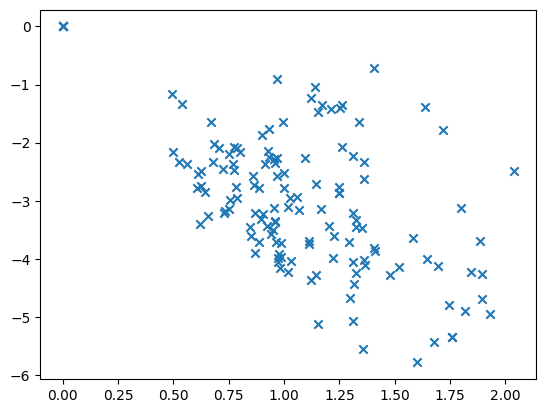

In [79]:
import matplotlib.pyplot as plt

#calculate 2d indicators
def indic(data):
    #alternatively you can calulate any other indicators
    max = np.max(data, axis=1)
    min = np.min(data, axis=1)
    return max, min

x,y = indic(vd)
plt.scatter(x, y, marker='x')
plt.show()

In [82]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_no = 10

def mbkmeans_clusters(
	X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [83]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vd,
    k=cluster_no,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in [clean_text(doc) for doc in docs]],
    "cluster": cluster_labels
})

For n_clusters = 10
Silhouette coefficient: 0.07
Inertia:484.3708934406231
Silhouette values:
    Cluster 3: Size:3 | Avg:0.24 | Min:0.18 | Max: 0.29
    Cluster 5: Size:21 | Avg:0.14 | Min:0.03 | Max: 0.26
    Cluster 4: Size:6 | Avg:0.11 | Min:-0.10 | Max: 0.33
    Cluster 6: Size:15 | Avg:0.10 | Min:0.01 | Max: 0.18
    Cluster 0: Size:19 | Avg:0.10 | Min:-0.02 | Max: 0.21
    Cluster 2: Size:14 | Avg:0.09 | Min:-0.08 | Max: 0.26
    Cluster 1: Size:11 | Avg:0.09 | Min:0.02 | Max: 0.20
    Cluster 9: Size:17 | Avg:0.07 | Min:-0.04 | Max: 0.21
    Cluster 8: Size:1 | Avg:0.00 | Min:0.00 | Max: 0.00
    Cluster 7: Size:30 | Avg:-0.04 | Min:-0.16 | Max: 0.09


/Users/chayapatr/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [84]:
print("Most representative terms per cluster (based on centroids):")
for i in range(cluster_no):
    tokens_per_cluster = ""
    most_representative = wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: whole some there its where 
Cluster 1: work this there way its 
Cluster 2: wout noko waal vits wol 
Cluster 3: cultur relig scand femal screami 
Cluster 4: boy see this kid one 
Cluster 5: see know n't think it 
Cluster 6: unless matter anything else not 
Cluster 7: any the for figure or 
Cluster 8: gahd sheeet gawsh sheeeet ghad 
Cluster 9: turn n't but way either 
